In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 200
pd.options.display.max_columns = 30

In [2]:
movies_df = pd.read_csv( "movie_metadata.csv" )

In [3]:
#check column labels
movies_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#drop labels we aren't likely interested in
movies_df.drop( labels = [ 'color', 'duration', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language',
                       'content_rating', 'aspect_ratio', 'num_critic_for_reviews', 'num_user_for_reviews', 'budget' ],
            axis = 1, inplace = True )

In [5]:
#rearrange column labels
movies_df = movies_df [ [ 'movie_title', 'title_year', 'country', 'gross', 'director_name', 'director_facebook_likes',
               'actor_1_name', 'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name',
               'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score', 'num_voted_users',
               'genres' ] ]

In [6]:
#drop movies where actors and directors with 0 likes
movies_df = movies_df.drop(movies_df[movies_df.actor_1_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.actor_2_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.actor_3_facebook_likes == 0].index)
movies_df = movies_df.drop(movies_df[movies_df.director_facebook_likes == 0].index)

In [7]:
#Checking for null actor 1 facebook likes
sum(movies_df.actor_1_facebook_likes.isnull())

#Dropping all null values
movies_df.dropna(inplace=True)

#Double check
movies_df.isnull().sum()

#Dropping duplicates
movies_df.drop_duplicates(subset ="movie_title", keep = 'first', inplace = True)

In [8]:
#drop movies not in the US
movies_df = movies_df.drop( movies_df[movies_df.country != 'USA'].index )
#view number of rows left
movies_df.shape

(2590, 17)

In [9]:
#checking if genres type and title type are string
print(isinstance((movies_df.loc[1, 'genres']), str))
print(isinstance((movies_df.loc[1, 'movie_title']), str))

True
True


In [10]:
#check if any of the genres entries is null, in this case none are so we don't have to worry about that in the next step
movies_df.genres.isnull().sum()

0

In [11]:
#genres:
#consider each genre seperately: extract genres delimited by "|" (pipeline)

#this variable will store all genres in the movie dataset
genre_dict = {}

#sample if need to test. Note: not 50 entries because we dropped certain rows & some of the indeces from 0-49 were dropped
#test = pd.DataFrame(movies.loc[0:49])


#change this back to movies.genres
for genres in movies_df.genres:
    #remove spaces from string so that something like "Action " vs " Action" are not treated differently
    genres_no_space = genres.strip()
    #need to extract genre by delimiter |
    genres_list = genres_no_space.split("|")
    
    #this block of code adds the genre as a key in dictionary and updates the count
    for genre in genres_list:
        
        #the key exists and we want to increment the count for movies with this genre
        if genre in genre_dict:
            genre_dict[genre] = genre_dict.get(genre) + 1   
        else: #add this genre if it doesn't already exist in the dict
            key_value = {genre : 1}
            genre_dict.update(key_value)

In [12]:
#REMEMBER: only loop once per row checking every dict entry

#list where we will store the genres. This is just convenient to have
genre_list = []
#add dictionary keys (genres) into our genre_list
for key in genre_dict:
    #don't add any genres whose corresponding movies count is less than 20, due to statistical insignificance
    if genre_dict[key] >= 20:
        genre_list.append(key)

#list where we will store all the movie titles. This is made to create index column of dataframe
movie_title_list = []
for title in movies_df.movie_title:
    movie_title_list.append(title)

#create the df whose columns titles are genres, and index is movie titles
movie_genre_df = pd.DataFrame(index = movie_title_list, columns = genre_list)
movie_genre_df.index.name = 'MovieTitle'

#fill the columns with 1 or 0, where 1 serves to tell us the movie belongs to the genre in the column title and 0 otherwise
for movie in movies_df.index:
    #current title of movie
    title = movies_df.movie_title.loc[movie]
    #current genre string of movie
    genres_str = movies_df.genres.loc[movie]
    
    #We have a genre list from previous code. We can loop over list and check if
    # current movie has certain genres. Note: will need movie title and genre
    for genre in genre_list:      
        #returns positive index of where substring was found in string, -1 if not found
        i = genres_str.find(genre)
        #if the genre is contained in the string then make the column corresponding to
        #this genre and this title in the movies_genre_df to 1 otherwise make it 0  
        if i >= 0:
            movie_genre_df.at[title, genre] = 1
        else:
            movie_genre_df.at[title, genre] = 0

In [13]:
#check movie_df
movies_df

,movie_title,title_year,country,gross,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,num_voted_users,genres
1,Pirates of the Caribbean: At World's End,2007.0,USA,309404152.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,7.1,471220,Action|Adventure|Fantasy
3,The Dark Knight Rises,2012.0,USA,448130642.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,8.5,1144337,Action|Thriller
5,John Carter,2012.0,USA,73058679.0,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,212204,Action|Adventure|Sci-Fi
7,Tangled,2010.0,USA,200807262.0,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,M.C. Gainey,284.0,2036,29000,7.8,294810,Adventure|Animation|Comedy|Family|Fantasy|Musi...
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,USA,423032628.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48486,5000,7.3,522040,Action|Adventure|Fantasy
14,The Lone Ranger,2013.0,USA,89289910.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Ruth Wilson,2000.0,Tom Wilkinson,1000.0,45757,48000,6.5,181792,Action|Adventure|Western
16,The Chronicles of Narnia: Prince Caspian,2008.0,USA,141614023.0,Andrew Adamson,80.0,Peter Dinklage,22000.0,Pierfrancesco Favino,216.0,Damián Alcázar,201.0,22697,0,6.6,149922,Action|Adventure|Family|Fantasy
18,Pirates of the Caribbean: On Stranger Tides,2011.0,USA,241063875.0,Rob Marshall,252.0,Johnny Depp,40000.0,Sam Claflin,11000.0,Stephen Graham,1000.0,54083,58000,6.7,370704,Action|Adventure|Fantasy
19,Men in Black 3,2012.0,USA,179020854.0,Barry Sonnenfeld,188.0,Will Smith,10000.0,Michael Stuhlbarg,816.0,Nicole Scherzinger,718.0,12572,40000,6.8,268154,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi
21,The Amazing Spider-Man,2012.0,USA,262030663.0,Marc Webb,464.0,Emma Stone,15000.0,Andrew Garfield,10000.0,Chris Zylka,963.0,28489,56000,7.0,451803,Action|Adventure|Fantasy


In [14]:
#check movie_genre_df
movie_genre_df

,Action,Adventure,Fantasy,Thriller,Sci-Fi,Animation,Comedy,Family,Musical,Romance,Western,Sport,Horror,Crime,Drama,Mystery,History,War,Biography,Music,Documentary
MovieTitle,,,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: At World's End,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John Carter,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tangled,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
Pirates of the Caribbean: Dead Man's Chest,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
The Lone Ranger,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
The Chronicles of Narnia: Prince Caspian,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: On Stranger Tides,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Men in Black 3,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#note that this shows we have null values in original movie dataset
movies_df.isnull().any(axis = 1).sum()
#TODO: next step is to deal with nulls

0

In [16]:
actors1 = movies_df['actor_1_name'].unique()
actors2 = movies_df['actor_2_name'].unique()
actors3 = movies_df['actor_3_name'].unique()
actorsList = list(set().union(actors1,actors2,actors3))

directorsList = movies_df['director_name'].unique()
print(len(directorsList))

1271


In [17]:
#Scatterplot for actor1_facebook_likes and movie gross
scatter1 = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
scatter1Mod = movies_df.plot.scatter(x = "actor_1_facebook_likes", y = "gross")
print(scatter1)

#Actual limit 600000. Few outliers beyond 100000, removing for better view of scatterplot
scatter1Mod.set_xlim([0, 100000])
print(scatter1Mod)

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


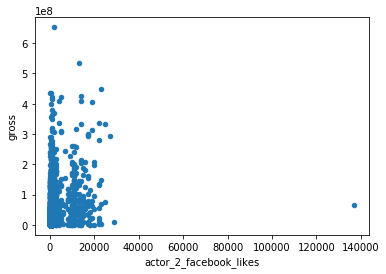

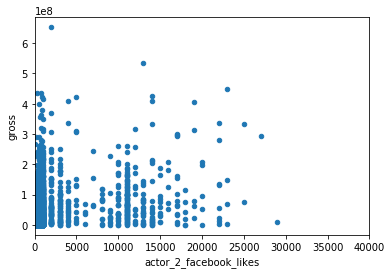

In [18]:
#Scatterplot for actor2_facebook_likes and movie gross
scatter2 = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
scatter2Mod = movies_df.plot.scatter(x = "actor_2_facebook_likes", y = "gross")
print(scatter2)

#Actual limit 140000. Few outliers beyond 40000, removing for better view of scatterplot
scatter2Mod.set_xlim([0, 40000])
print(scatter2Mod)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


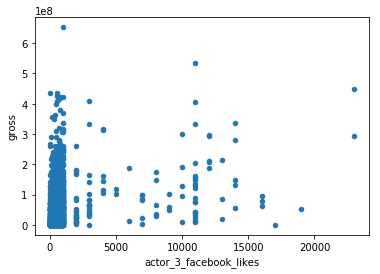

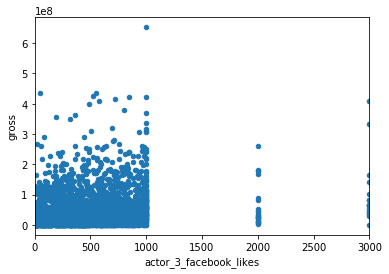

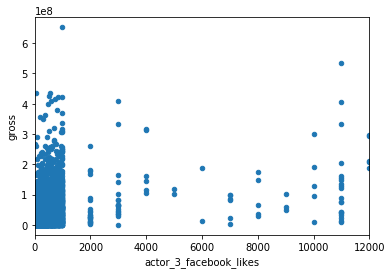

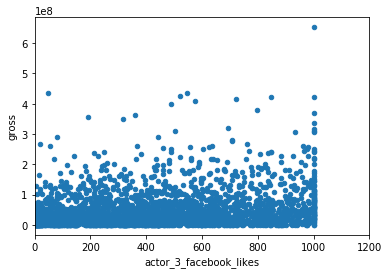

In [19]:
#Scatterplot for actor3_facebook_likes and movie gross
scatter3 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod1 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod2 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")
scatter3Mod3 = movies_df.plot.scatter(x = "actor_3_facebook_likes", y = "gross")


print(scatter3)

#No notable outliers. Reducing Xlim to display more accurate scatter plot views
scatter3Mod1.set_xlim([0, 3000])
scatter3Mod2.set_xlim([0, 12000])
scatter3Mod3.set_xlim([0, 1200])


print(scatter3Mod1)
print(scatter3Mod2)

AxesSubplot(0.125,0.125;0.775x0.755)


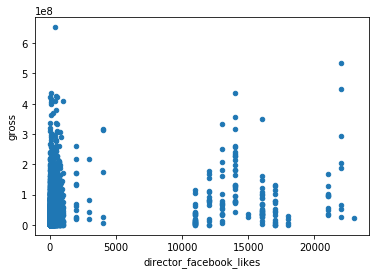

In [20]:
#Scatterplot for director_facebook_likes and movie gross
directScatter = movies_df.plot.scatter(x = "director_facebook_likes", y = "gross")

print(directScatter)

In [23]:
#Add all actor likes in the Action genre

actionSum = 0.0

for i, rows in movie_genre_df.iterrows():
    if (rows['Action'] == 1):
        currMovie = movies_df[movies_df['movie_title'] == i]['actor_1_facebook_likes']
        
        
print(actionSum)
        
        

1      NaN
3      NaN
5      NaN
13     NaN
14     NaN
16     NaN
18     NaN
19     NaN
21     NaN
27     NaN
28     NaN
29     NaN
32     NaN
39     NaN
40     NaN
42     NaN
44     NaN
46     NaN
48     NaN
51     NaN
54     NaN
57     NaN
59     NaN
60     NaN
63     NaN
66     NaN
68     NaN
69     NaN
71     NaN
72     NaN
73     NaN
75     NaN
76     NaN
77     NaN
80     NaN
81     NaN
82     NaN
83     NaN
85     NaN
86     NaN
88     NaN
89     NaN
92     NaN
94     NaN
95     NaN
97     NaN
100    NaN
102    NaN
104    NaN
105    NaN
109    NaN
116    NaN
120    NaN
121    NaN
123    NaN
127    NaN
132    NaN
133    NaN
139    NaN
141    NaN
142    NaN
143    NaN
150    NaN
152    NaN
154    NaN
155    NaN
158    NaN
160    NaN
162    NaN
163    NaN
164    NaN
166    NaN
168    NaN
170    NaN
171    NaN
173    NaN
176    NaN
183    NaN
184    NaN
185    NaN
191    NaN
192    NaN
194    NaN
201    NaN
203    NaN
205    NaN
211    NaN
213    NaN
214    NaN
215    NaN
216    NaN

In [22]:
movies_df[movies_df['movie_title'].str.contains("TRON: Legacy")]

,movie_title,title_year,country,gross,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,num_voted_users,genres
40,TRON: Legacy,2010.0,USA,172051787.0,Joseph Kosinski,364.0,Jeff Bridges,12000.0,Olivia Wilde,10000.0,James Frain,1000.0,25550,30000,6.8,264183,Action|Adventure|Sci-Fi
